In [2]:
import qutip, pickle, sys
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import time as time
import math, cmath

import projected_evolution_dynamics as me
import matrix_analysis_lib as mat_ansys
import spin_representations as su2
import evs_visualization_tools as evs_visz_tools

from IPython.display import display, Math, Latex
np.set_printoptions(threshold=1.e-9,linewidth=120,precision=3, suppress=True, formatter={"float":lambda x: str(.001*int(1000*x))})

In [56]:
N=6; chain_type = "XX"; k_B = 1; temp = 2e-1

### Construcción de los operadores
spin_ops_list = su2.one_body_spin_ops(N)
identity_op = spin_ops_list[0][0]
ts = np.linspace(0, 20.,100)  

### Heisenberg Hamiltonian
Hamiltonian_paras = [.2, .15, .1, 1.]
H_H = su2.Heisenberg_Hamiltonian(op_list = spin_ops_list, chain_type = chain_type,
                                size = N, Hamiltonian_paras = Hamiltonian_paras,
                                closed_bcs = True, visualization = False)

### classical operators 

cl_ops, label_ops = su2.classical_ops(H_H, N, spin_ops_list, False)
magnetization = sum(spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))
neel_operator = sum((-1)**a * spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))

cl_ops["magnetization"] = magnetization; label_ops.append("magnetization")
cl_ops["neel_op"] = neel_operator; label_ops.append("neel_op")
print("Are all the operators Hermitian?:", mat_ansys.basis_hermitian_check(cl_ops))

Are all the operators Hermitian?: [True, True, True, True, True, True, True, True, True, True]


Processing step:  0 and temperature  0.2
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  6
3. rho_ref:  Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0.015 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.015 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.015 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.015 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.015 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.015]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
4. Evolutions concluded.
Processing step:  1 and temperature  1.0
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  6
3. rho_ref:  Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0.015 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.015 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.015 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 

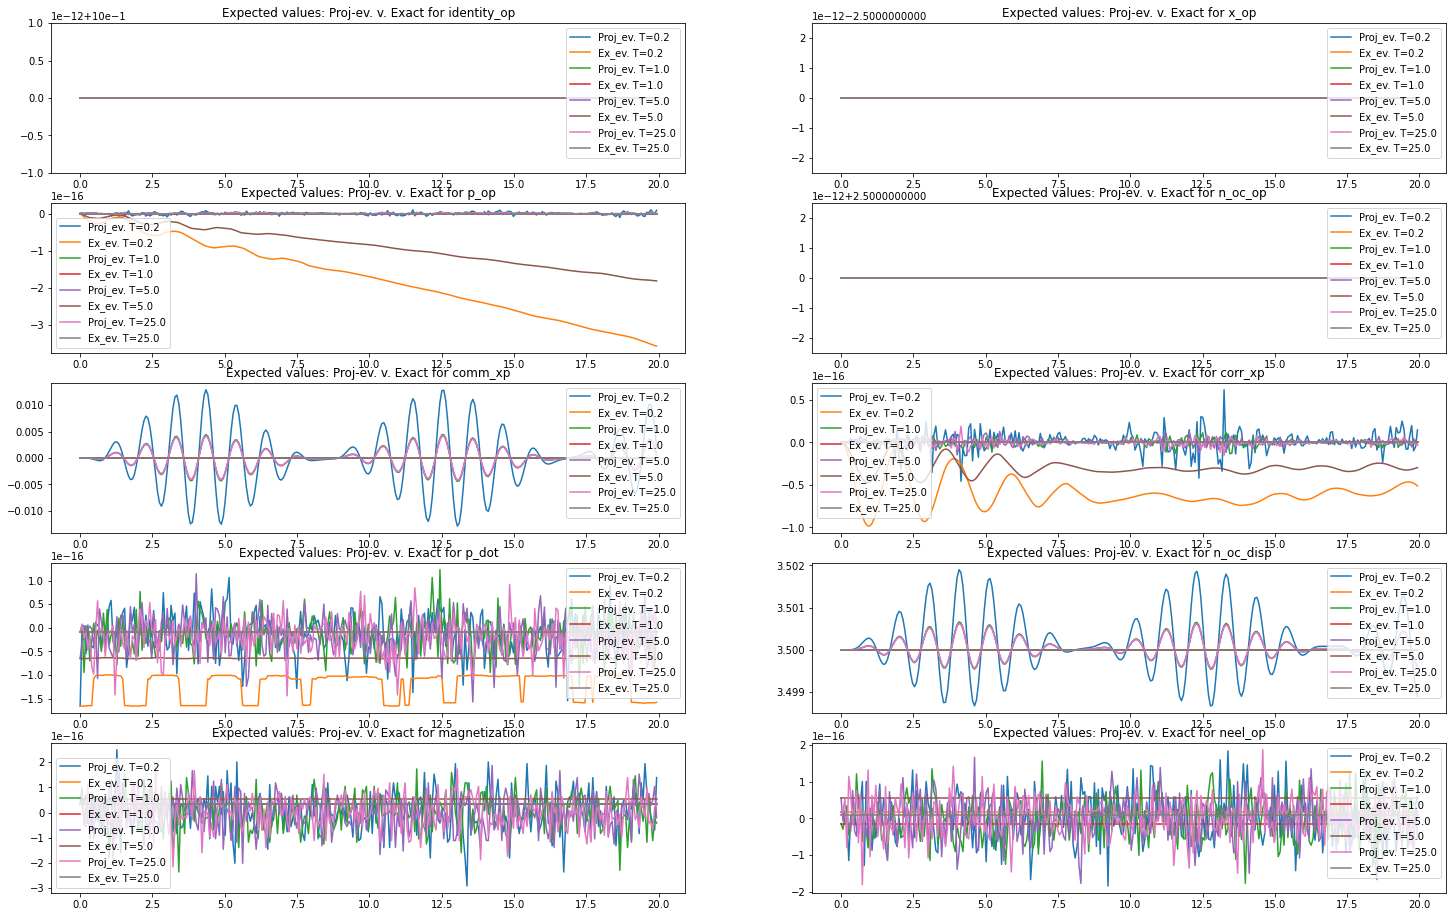

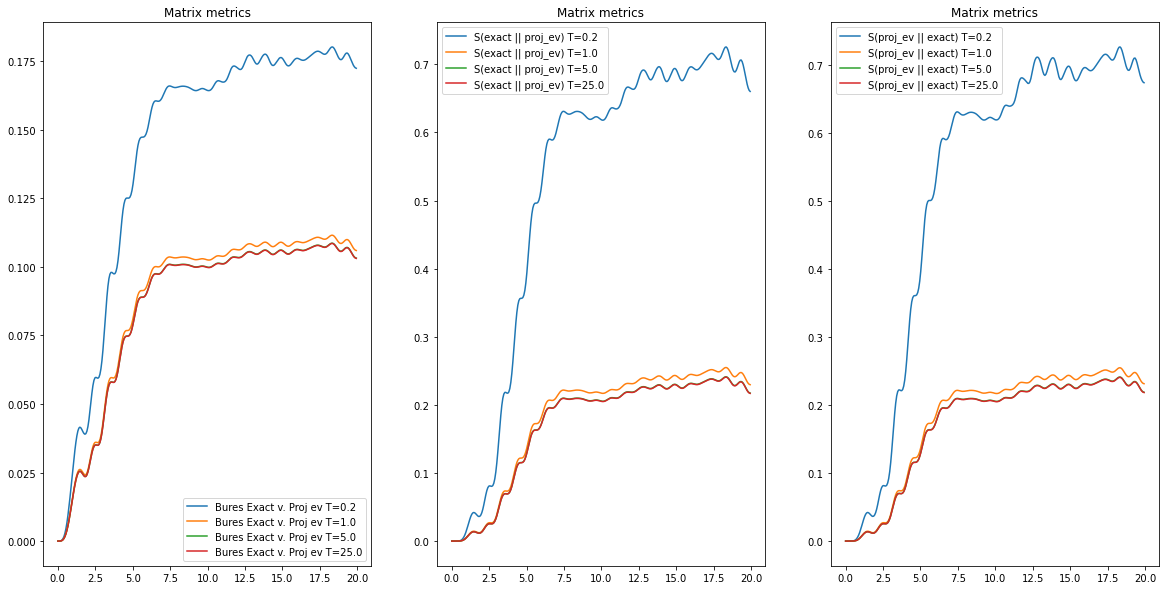

In [57]:
### N = 6 XX

ts = np.linspace(0, 20., 300)
coeff_list = [0, 0., .5, .0, .0, .0] 
range_temps = [2e-1 * 5**i for i in range(4)]

depth_and_seed_ops = [(1, cl_ops["identity_op"]), 
                      (1, H_H), 
                      (4, spin_ops_list[1][0]),
                      ]

multiple_ev_results = me.N_fixed_multiple_temps_proj_evs(depth_and_seed_ops, 
                                                         observables = list(cl_ops.values()),
                                                            label_ops = label_ops, 
                                                            ref_operator = spin_ops_list[1][0],
                                                            Hamiltonian = H_H,
                                                            temp_rho = temp, 
                                                            init_coeff_list = coeff_list,
                                                            timespan = ts, range_temps = range_temps)

evs_visz_tools.plot_exact_v_proj_ev_avgs_multiple(labels = label_ops,
                         timespan = ts,
                         no_cols_desired = 2,
                         multiple_evolutions = multiple_ev_results,
                         range_of_temps_or_dims = range_temps, 
                                                  plot_var_lengths = False,
                                          plot_var_liesubalg_dim = False,
                                          plot_var_temps = True
                        )

matrix_metric = mat_ansys.exact_v_proj_ev_matrix_metrics_multiple(timespan = ts,
                                                                  range_of_temps_or_dims = range_temps,
                                                                  multiple_evolutions = multiple_ev_results, 
                                                                  plot_var_lengths = False,
                                          plot_var_liesubalg_dim = False,
                                          plot_var_temps = True)


evs_visz_tools.plot_exact_v_proj_ev_metrics_multiple(timespan = ts,
                                                     range_of_temps_or_dims = range_temps,
                                                     metric_local = matrix_metric,
                                                    plot_var_lengths = False,
                                          plot_var_liesubalg_dim = False,
                                          plot_var_temps = True)

Processing step:  0 and temperature  0.2
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  6
3. rho_ref:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.249 0.0 -0.212 0.0]
 [0.0 0.249 0.0 -0.212]
 [-0.212 0.0 0.25 0.0]
 [0.0 -0.212 0.0 0.25]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
4. Evolutions concluded.
Processing step:  1 and temperature  1.0
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  6
3. rho_ref:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.25 0.0 -0.061 0.0]
 [0.0 0.25 0.0 -0.061]
 [-0.061 0.0 0.249 0.0]
 [0.0 -0.061 0.0 0.249]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
4. Evolutions concluded.
Processing step:  2 and temperature  5.0
1. Processing referen

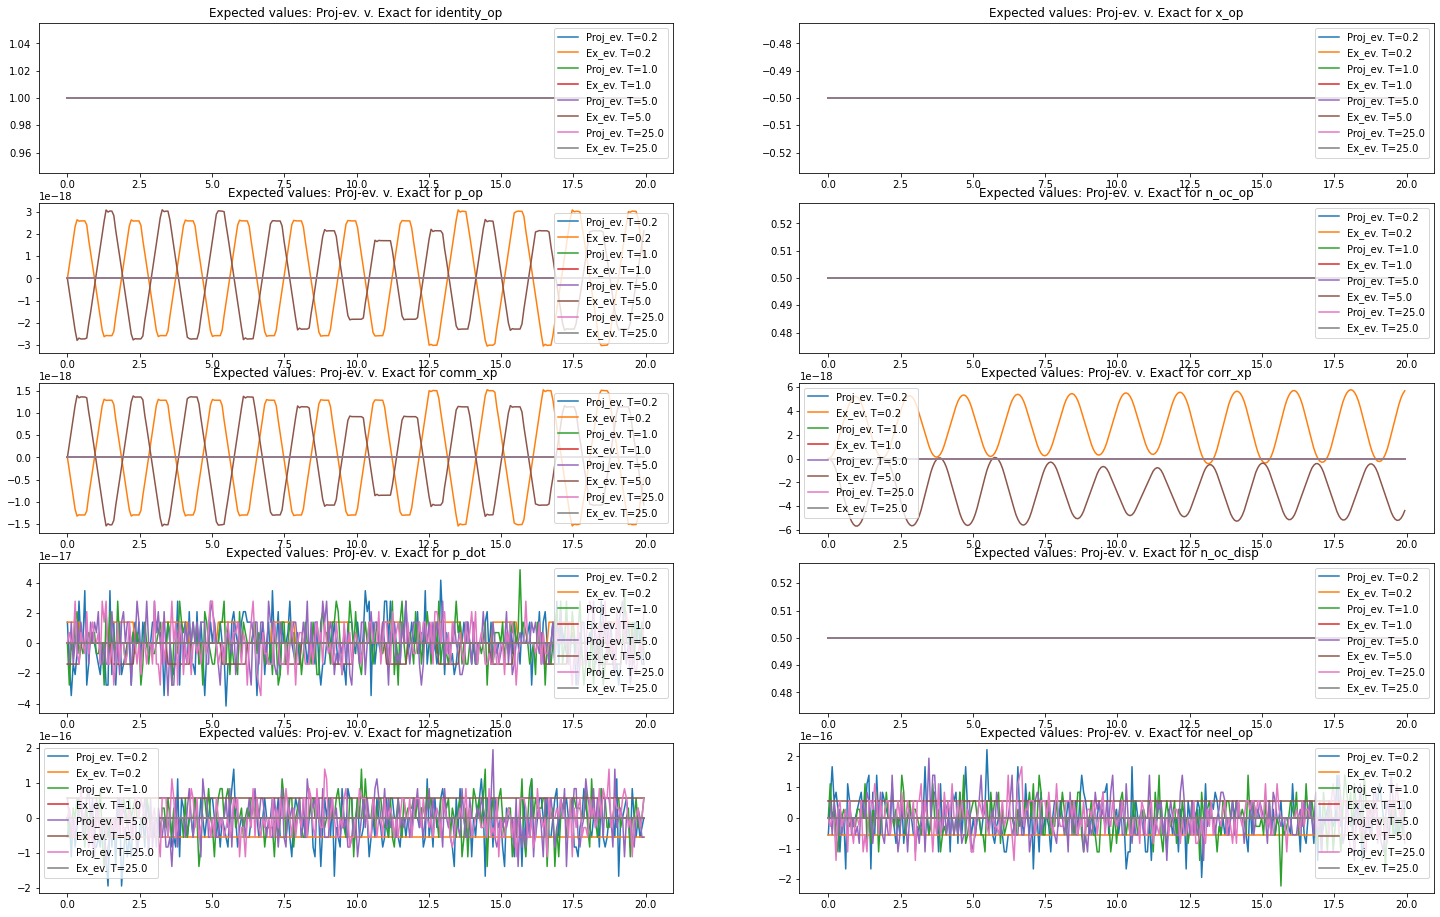

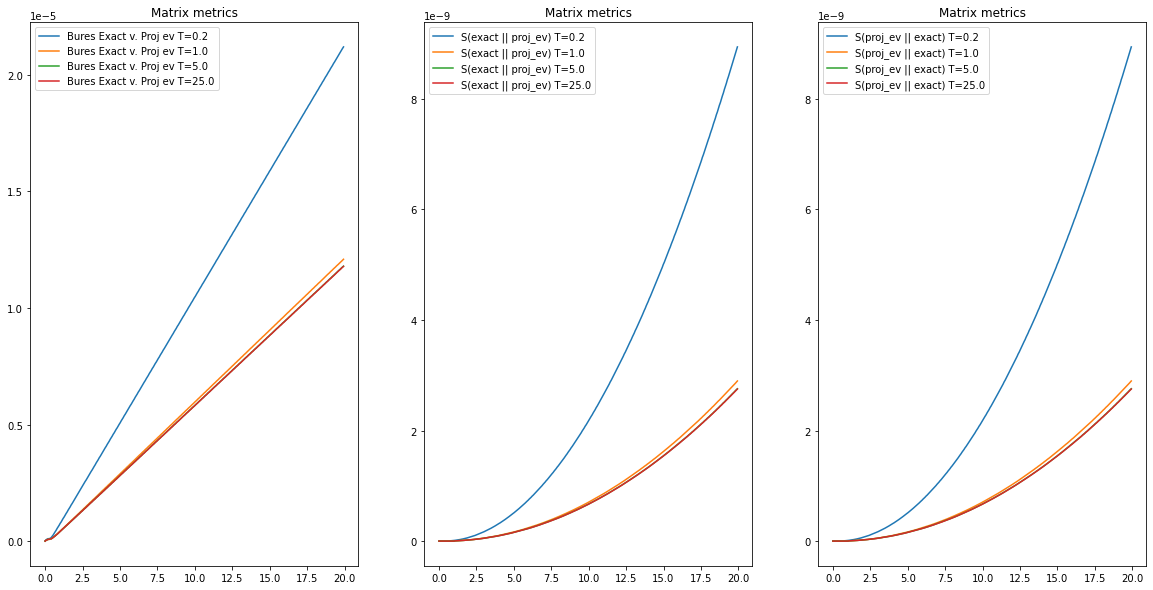

In [10]:
### N = 2 XX

ts = np.linspace(0, 20., 300)
coeff_list = [0, 0., .5, .0, .0, .0] 
range_temps = [2e-1 * 5**i for i in range(4)]

depth_and_seed_ops = [(1, cl_ops["identity_op"]), 
                      (1, H_H), 
                      (4, spin_ops_list[1][0]),
                      ]

multiple_ev_results = me.N_fixed_multiple_temps_proj_evs(depth_and_seed_ops, 
                                                         observables = list(cl_ops.values()),
                                                            label_ops = label_ops, 
                                                            ref_operator = spin_ops_list[1][0],
                                                            Hamiltonian = H_H,
                                                            temp_rho = temp, 
                                                            init_coeff_list = coeff_list,
                                                            timespan = ts, range_temps = range_temps)

evs_visz_tools.plot_exact_v_proj_ev_avgs_multiple(labels = label_ops,
                         timespan = ts,
                         no_cols_desired = 2,
                         multiple_evolutions = multiple_ev_results,
                         range_of_temps_or_dims = range_temps, 
                                                  plot_var_lengths = False,
                                          plot_var_liesubalg_dim = False,
                                          plot_var_temps = True
                        )

matrix_metric = mat_ansys.exact_v_proj_ev_matrix_metrics_multiple(timespan = ts,
                                                                  range_of_temps_or_dims = range_temps,
                                                                  multiple_evolutions = multiple_ev_results, 
                                                                  plot_var_lengths = False,
                                          plot_var_liesubalg_dim = False,
                                          plot_var_temps = True)


evs_visz_tools.plot_exact_v_proj_ev_metrics_multiple(timespan = ts,
                                                     range_of_temps_or_dims = range_temps,
                                                     metric_local = matrix_metric,
                                                    plot_var_lengths = False,
                                          plot_var_liesubalg_dim = False,
                                          plot_var_temps = True)